# <span style="color:blue; font-size:16;">Eample saspy notebook showing the python interface to SAS</span>

# Initial

In [2]:
import saspy
import pandas as pd
from IPython.display import HTML

# Start a SAS session

In [3]:
sas = saspy.SASsession(cfgname='winlocal')

SAS Connection established. Subprocess id is 7116



# Load data into SAS

In [4]:
hr = sas.read_csv("HR_comma_sep.csv")

# Explore the data

### List the variables

In [7]:
sas.teach_me_SAS(False)
hr.columnInfo()

,Member,Num,Variable,Type,Len,Pos,Format,Informat
0,WORK._CSV,6,Work_accident,Num,8,40,BEST12.,BEST32.
1,WORK._CSV,4,average_montly_hours,Num,8,24,BEST12.,BEST32.
2,WORK._CSV,2,last_evaluation,Num,8,8,BEST12.,BEST32.
3,WORK._CSV,7,left,Num,8,48,BEST12.,BEST32.
4,WORK._CSV,3,number_project,Num,8,16,BEST12.,BEST32.
5,WORK._CSV,8,promotion_last_5years,Num,8,56,BEST12.,BEST32.
6,WORK._CSV,10,salary,Char,6,69,$6.,$6.
7,WORK._CSV,9,sales,Char,5,64,$5.,$5.
8,WORK._CSV,1,satisfaction_level,Num,8,0,BEST12.,BEST32.
9,WORK._CSV,5,time_spend_company,Num,8,32,BEST12.,BEST32.


### See the first observations

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Summary of numeric columns

In [9]:
hr.describe()

,Variable,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,satisfaction_level,14999,0,0.64,0.612834,0.248631,0.09,0.44,0.64,0.82,1
1,last_evaluation,14999,0,0.72,0.716102,0.171169,0.36,0.56,0.72,0.87,1
2,number_project,14999,0,4.00,3.803054,1.232592,2.00,3.00,4.00,5.00,7
3,average_montly_hours,14999,0,200.00,201.050337,49.943099,96.00,156.00,200.00,245.00,310
4,time_spend_company,14999,0,3.00,3.498233,1.460136,2.00,3.00,3.00,4.00,10
5,Work_accident,14999,0,0.00,0.144610,0.351719,0.00,0.00,0.00,0.00,1
6,left,14999,0,0.00,0.238083,0.425924,0.00,0.00,0.00,0.00,1
7,promotion_last_5years,14999,0,0.00,0.021268,0.144281,0.00,0.00,0.00,0.00,1


### Basic bar chart


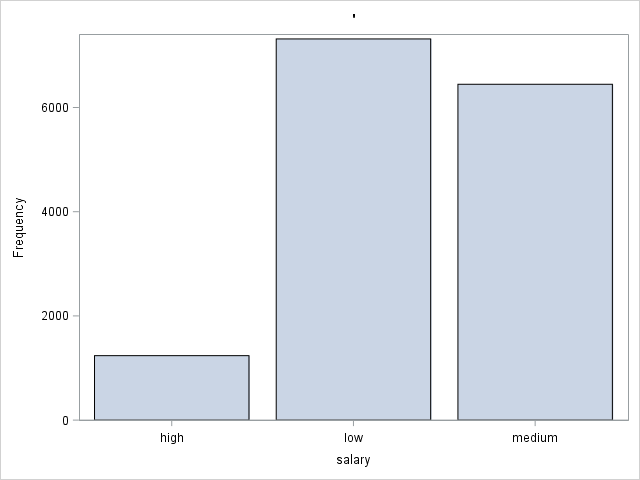

In [10]:
hr.bar('salary')

### Basic histogram


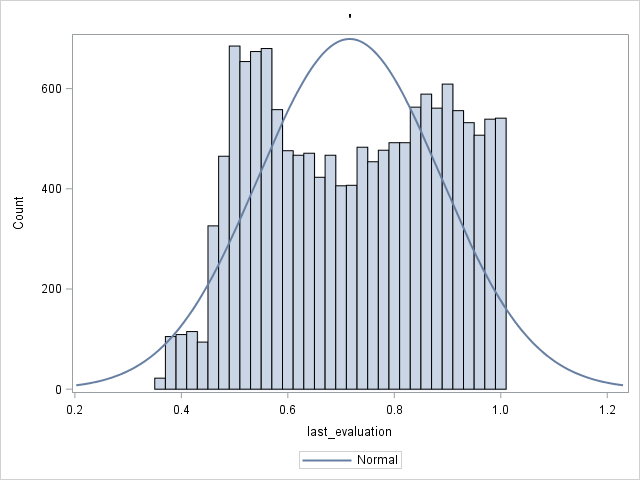

In [11]:
hr.hist('last_evaluation')

### Submit SAS code directly from Python session


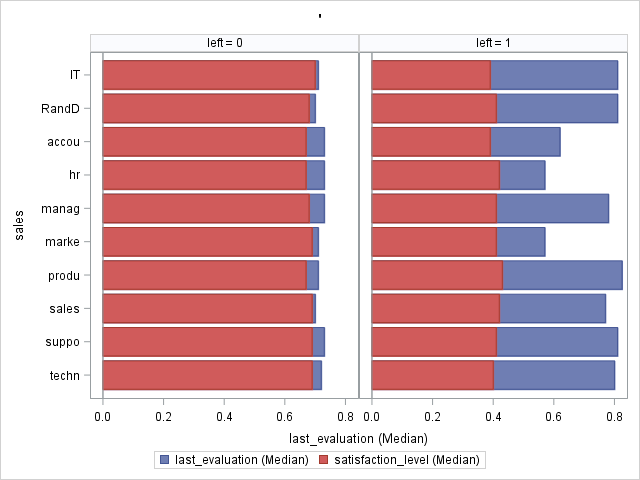

In [26]:
c = sas.submit("""
proc sgpanel data=work._csv;
    PANELBY left;
    hbar sales / response=last_evaluation    stat=median;
    hbar sales / response=satisfaction_level stat=median;
run;
""")
HTML(c['LST'])

### Build an analytical model

The SAS/Python interface is capable of modeling in a number of distinct areas (statistics, machine learning, econometric time series, and so on)
* UTIL (SAS Base procedures)
* STAT (SAS/STAT)
* Machine learning (SAS Enterprise Miner)
* QC (SAS/QC)

In [12]:
util = sas.sasutil()
stat = sas.sasstat()
ml   = sas.sasml()
qc   = sas.sasqc()

### Let's run a logistic model

In [13]:
stat_results = stat.logistic(cls='work_accident promotion_last_5years salary sales', 
                             model='left =work_accident promotion_last_5years salary sales satisfaction_level last_evaluation number_project average_montly_hours time_spend_company',
                             data=hr)

### Returned output object

In [39]:
dir(stat_results)

['ASSOCIATION',
 'CLASSLEVELINFO',
 'CONVERGENCESTATUS',
 'EFFECTPLOT',
 'FITSTATISTICS',
 'GLOBALTESTS',
 'LOG',
 'MODELANOVA',
 'MODELINFO',
 'NOBS',
 'ODDSRATIOS',
 'ORPLOT',
 'PARAMETERESTIMATES',
 'RESPONSEPROFILE',
 'ROCCURVE']

### Pick any one you want
* one
* two


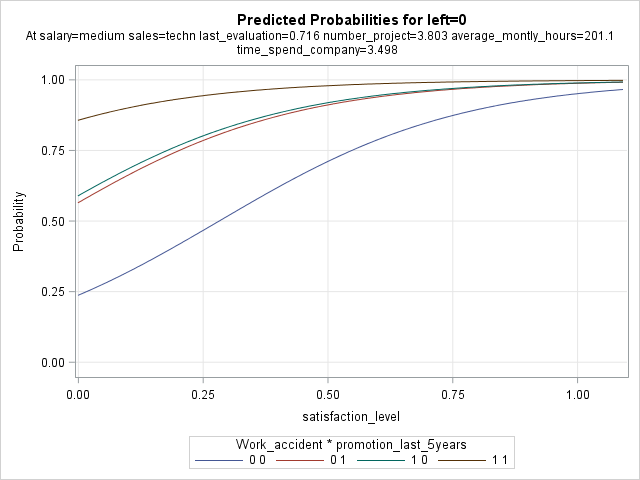

In [16]:
stat_results.EFFECTPLOT